In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Centered Divided Differences

As we've already shown when we discussed Simpson's method, if we interpolate between three pairs of points, say $(x_{j-1},f_{j-1})$, $(x_{j},f_{j})$, $(x_{j+1},f_{j+1})$, where $\delta x = x_{j}-x_{j-1}$, with the parabola

$$
y_{j}(x) = a_{j}(x-x_{j})^{2} + b_{j}(x-x_{j}) + c_{j}
$$

then we have that $c_{j}=f_{j}$ and 

$$
a_{j} = \frac{1}{2(\delta x)^{2}}\left(f_{j+1} -2f_{j} + f_{j-1}\right), ~ b_{j} = \frac{1}{2\delta x}\left(f_{j+1} -f_{j-1} \right)
$$

Using Taylor series arguments, we see that

\begin{align*}
f_{j+1} = f(x_{j} + \delta x) = & f_{j} + f'(x_{j})\delta x + \frac{1}{2}f''(x_{j}) (\delta x)^{2} + \frac{1}{6}f'''(x_{j})(\delta x)^{3} + \frac{1}{24}f''''(x_{j})(\delta x)^{4} + \mathcal{O}((\delta x )^{5})\\ 
f_{j-1} = f(x_{j} - \delta x) = & f_{j} - f'(x_{j})\delta x + \frac{1}{2}f''(x_{j}) (\delta x)^{2} - \frac{1}{6}f'''(x_{j})(\delta x)^{3} + \frac{1}{24}f''''(x_{j})(\delta x)^{4} + \mathcal{O}((\delta x )^{5})\\ 
\end{align*}

Using these we then see that

$$
\frac{1}{2\delta x}\left(f_{j+1} -f_{j-1} \right) = \frac{1}{2\delta x}\left(2f'(x_{j})\delta x + \frac{1}{3}f'''(x_{j})(\delta x)^{3} + \mathcal{O}((\delta x)^{5})\right)
$$

so under rearrangement, we have the approximation to $f'(x_{j})$

$$
f'(x_{j}) = \frac{1}{2\delta x}\left(f_{j+1} -f_{j-1} \right) - \frac{1}{6}f'''(x_{j})(\delta x)^{2} + \mathcal{O}((\delta x)^{4})
$$

We likewise can show that 

$$
f''(x_{j}) = \frac{1}{(\delta x)^{2}}\left(f_{j+1} -2f_{j} + f_{j-1}\right) - \frac{1}{12}f''''(x_{j})(\delta x)^{2} + \mathcal{O}((\delta x)^{3}).
$$

Thus, we see that we have found a way to discretize the first and second derivatives such that the error goes like $\mathcal{O}((\delta x)^{2})$, and so we call these second-order accurate approximations.  We also describe them as _centered_ due to the symmetry of how we build the approximation.  

Okay,  fine, but let's see what this really means.  Our test function will be $f(x)=\sin(x)$ so that $f'(x)=\cos(x)$.  To test our approximation, we then use the following code.

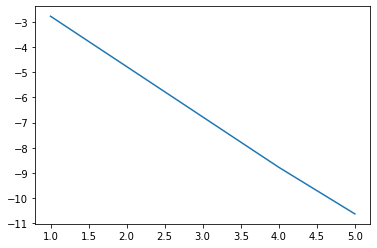

In [2]:
fun = lambda x: np.sin(x)
dfun = lambda x: np.cos(x)
Nvals = np.array([1e1, 1e2, 1e3, 1e4, 1e5])
Errors = np.zeros(np.size(Nvals))

for jj in range(np.size(Nvals)):
    xvals = np.linspace(0.,1.,int(Nvals[jj])+1)
    fvals = fun(xvals)
    dftrue = dfun(xvals)
    
    fplus = fvals[2:]
    fminus = fvals[:-2]
    fprime = (fplus-fminus)/(2.*(xvals[1]-xvals[0]))
    Errors[jj] = np.max(np.abs(fprime - dftrue[1:-1]))
    
plt.plot(np.log10(Nvals), np.log10(Errors))

## General Divided Differences

So, we in some sense stumbled upon the above derivative approximations.  How might we be more systematic about doing this?  And what happens if we want derivative approximations which are not centered?  Then what?  

This is where our general Lagrange interpolation approach becomes really powerful.  In general, if I give you data $\left\{x_{j},f_{j}\right\}_{j=0}^{n}$, then from the approximating interoplating polynomial $p_{n}(x)\approx f(x)$ where 

$$
p_{n}(x) = \sum_{j=0}^{n}f_{j}L_{j}(x),
$$

then we can approximate $f'(x_{j})\approx p_{n}'(x_{j})$.

### Off-Centered Approximations

### Higher-Order Centered Approximations

### Derivatives using Chebyshev Polynomials